In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

# Define constants from the Lua code



calibers_list = {
    "9mm": {
        "modifier": 1,
        "str": 48},
	".44": {
        "modifier": 1.38,
        "str": 70},


    "556": {
        "modifier": 1.38,
        "str": 64
    },
    "762WP": {
        "modifier": 1.52,
        "str": 71
    },
    "762NATO": {
        "modifier": 1.72,
        "str": 77
    },
    "50BMG": {
        "modifier": 1.9,
        "str": 90
    }
}




In [10]:
### new
results = []

adjust = 0.6
poten = 1.9

def OLDget_caliber_str(str, breakpoint, modifier):

	adjusted_breakpoint = breakpoint * adjust
	adjusted_str = str * adjust	
	if str < breakpoint:
		scaleFactor = 20.0 + ((100.0 - 20.0) * (adjusted_breakpoint - adjusted_str) / adjusted_breakpoint)
	else:
		if breakpoint < 80:
			scaleFactor = 20.0 - (20.0 * (adjusted_str - adjusted_breakpoint) /(100.0 - adjusted_breakpoint))
		elif breakpoint < 90:
			scaleFactor = 20.0 - (18 * (adjusted_str - adjusted_breakpoint) /(100.0 - adjusted_breakpoint))
		else:
			scaleFactor = 20.0 - (12 * (adjusted_str - adjusted_breakpoint) / (100.0 - adjusted_breakpoint))	
	breakpoint = breakpoint * modifier
	str_mod_f = ((scaleFactor * 2.5 * adjust) +35 + breakpoint) / 100	
	str_mod_f = str_mod_f ** poten
	return str_mod_f,scaleFactor

new_adjust = 0.4 #### this helps compress the differences between breakpoint and max value
new_calibers_list = {
    "9mm": {
        "modifier": 1.20,
        "str": 48},
	".44": {
        "modifier": 1.40,
        "str": 70},


    "556": {
        "modifier": 1.40,
        "str": 65
    },
    "762WP": {
        "modifier": 1.50,#1.48,
        "str": 71
    },
    "762NATO": {
        "modifier": 1.55,#1.58,
        "str": 77
    },
    "50BMG": {
        "modifier": 1.60,#1.58, ####
        "str": 90
    }
}

def new_get_caliber_str(str, breakpoint, modifier):
	adjusted_breakpoint = breakpoint * new_adjust
	adjusted_str = str *new_adjust
	if str < breakpoint:
		scaleFactor = (20.0 + ((100.0 -20.0) * (adjusted_breakpoint - adjusted_str) / adjusted_breakpoint))
	else:
		scaleFactor = 20.0 - (20.0 * (adjusted_str - adjusted_breakpoint) /(100.0 - adjusted_breakpoint))

	modified_breakpoint = breakpoint * modifier
	str_mod_f = ((scaleFactor* adjust*2.5) + 35 + modified_breakpoint) / 100	
	str_mod_f = str_mod_f ** poten
	

	##
	##str_mod_f = scaleFactor * modified_breakpoint /100
	return str_mod_f, scaleFactor

first_value = 40
last_value = 101
step = 1


for caliber, data in calibers_list.items(): 
		first_str_mod_f = None
		last_str_mod_f = None
		for input_str in range(first_value, last_value, step):
			str_mod_f, scaleFactor= new_get_caliber_str( input_str ,new_calibers_list[caliber]["str"],new_calibers_list[caliber]["modifier"])
			#old_str_mod_f, old_scaleFactor = OLDget_caliber_str(input_str ,data["str"],data["modifier"])
			old_str_mod_f, old_scaleFactor = new_get_caliber_str(input_str ,data["str"],data["modifier"])

			if input_str == first_value:
				first_str_mod_f = str_mod_f
			if input_str == last_value-1:
				last_str_mod_f = str_mod_f

			results.append({"Caliber": caliber,
							"Input Strength": input_str,
							"Breakpoint": data["str"],
							"Old Str Mod":old_str_mod_f,
							"Strength Modifier": str_mod_f,
							"Old ScaleFactor": old_scaleFactor,
							"ScaleFactor": scaleFactor,
							"diff":  str_mod_f- old_str_mod_f ,
							"(%) diff": ((str_mod_f- old_str_mod_f)/old_str_mod_f)*100,
							})

		if first_str_mod_f is not None and last_str_mod_f is not None:
			diff_first_last =  last_str_mod_f   -first_str_mod_f 
			percent_diff_first_last = (diff_first_last / first_str_mod_f) * 100

			# Append the difference for each row of this caliber
			for result in results:
				if result["Caliber"] == caliber:
					result["1st to last dif (new)"] = diff_first_last
					result["(%) 1st to last dif (new)"] = percent_diff_first_last

# Convert results to a Pandas DataFrame
newresults_df = pd.DataFrame(results)

# Display the table


newresults_df




,Caliber,Input Strength,Breakpoint,Old Str Mod,Strength Modifier,Old ScaleFactor,ScaleFactor,diff,(%) diff,1st to last dif (new),(%) 1st to last dif (new)
0,9mm,40,48,1.719167,1.962579,33.333333,33.333333,0.243412,14.158691,-0.661078,-33.684141
1,9mm,41,48,1.658288,1.897721,31.666667,31.666667,0.239433,14.438586,-0.661078,-33.684141
2,9mm,42,48,1.598450,1.833897,30.000000,30.000000,0.235448,14.729759,-0.661078,-33.684141
3,9mm,43,48,1.539654,1.771108,28.333333,28.333333,0.231455,15.032904,-0.661078,-33.684141
4,9mm,44,48,1.481903,1.709357,26.666667,26.666667,0.227454,15.348774,-0.661078,-33.684141
...,...,...,...,...,...,...,...,...,...,...,...
361,50BMG,96,90,5.065122,4.016283,19.250000,19.250000,-1.048839,-20.707084,-2.877620,-41.908618
362,50BMG,97,90,5.057442,4.009403,19.125000,19.125000,-1.048039,-20.722717,-2.877620,-41.908618
363,50BMG,98,90,5.049768,4.002528,19.000000,19.000000,-1.047240,-20.738373,-2.877620,-41.908618
364,50BMG,99,90,5.042099,3.995659,18.875000,18.875000,-1.046440,-20.754053,-2.877620,-41.908618


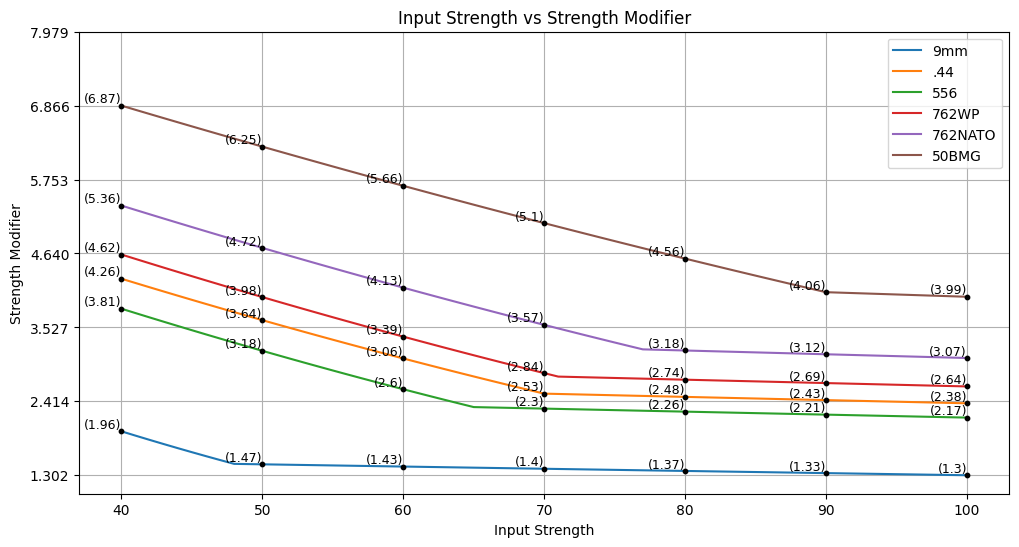

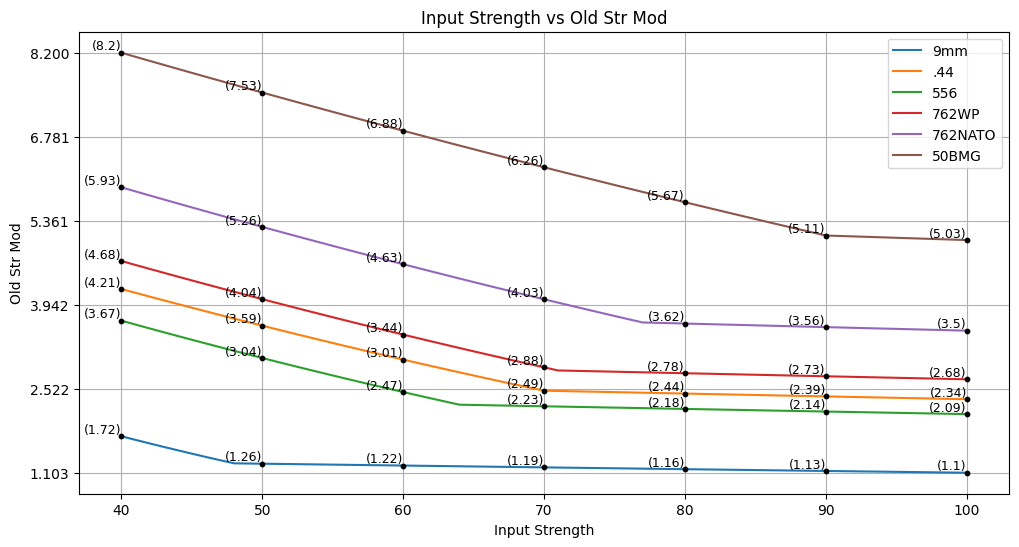

In [11]:
x_step = max(step, 10)
y_step = None


def make_graph(df, x, y, x_step=None, y_step=None, title=None):
    plt.figure(figsize=(12, 6))

    # Plot each caliber subset
    for caliber in df["Caliber"].unique():
        subset = df[df["Caliber"] == caliber]
        plt.plot(subset[x], subset[y], label=caliber)

        # Add labels for points at each x_step interval
        for i in range(len(subset)):
            # Check if the x value is close to a multiple of x_step
            if x_step is not None and (subset[x].iloc[i] % x_step == 0):
                # Round the y value to 2 decimal places and annotate the point
                y_value = round(subset[y].iloc[i], 2)
                x_value = round(subset[x].iloc[i], 2)
                
                # Annotate the point with a circle marker and y-value
                plt.scatter(subset[x].iloc[i], subset[y].iloc[i], color='black', s=10, zorder=5)  # s=50 for circle size
                plt.text(subset[x].iloc[i], subset[y].iloc[i], f"({y_value})", fontsize=9, ha='right', va='bottom', color='black')

    # Set the title, x-axis label, and y-axis label
    if title is None:
        title = f"{x} vs {y}"
    plt.title(title)
    plt.xlabel(x)
    plt.ylabel(y)

    # If no x_step is provided, calculate a default step size
    if x_step is None:
        x_range = max(df[x]) - min(df[x])
        x_step = x_range / 10  # Default to 10 steps on the x-axis

    # If no y_step is provided, calculate a default step size
    if y_step is None:
        y_range = max(df[y]) - min(df[y])
        y_step = y_range / 5  # Default to 5 steps on the y-axis

    # Set the tick positions
    x_ticks = np.arange(min(df[x]), max(df[x]) + x_step, x_step)
    y_ticks = np.arange(min(df[y]), max(df[y]) + y_step, y_step)

    # Set the tick marks
    plt.xticks(x_ticks)
    plt.yticks(y_ticks)

    # Add legend, grid, and show the plot
    plt.legend()
    plt.grid()
    plt.show()

make_graph(newresults_df, "Input Strength","Strength Modifier", x_step, y_step)
make_graph(newresults_df,"Input Strength","Old Str Mod", x_step, y_step)

In [12]:
breakpoint_results = []
#print("caliber", "new_value", "old_value")
for caliber, data in new_calibers_list.items(): 
	breakpoint = data["str"]
	caliberDf = newresults_df[(newresults_df["Caliber"]== caliber)]

	at_maxvalueDF = caliberDf[(caliberDf["Input Strength"] == last_value-1)]
	new_atmax = at_maxvalueDF["Strength Modifier"].values[0]
	old_atmax =at_maxvalueDF["Old Str Mod"].values[0]
	at_max_diff = new_atmax - old_atmax
	at_max_percent_diff = (at_max_diff / old_atmax) * 100

	at_breakpointDf = caliberDf[(caliberDf["Input Strength"] == breakpoint)]
	new_value = at_breakpointDf["Strength Modifier"].values[0]
	old_value = at_breakpointDf["Old Str Mod"].values[0]
	diff =  new_value - old_value 
	percent_diff = (diff / old_value)*100

	new_diff = new_value - new_atmax
	old_diff = old_value - old_atmax
	new_percent_diff = (new_diff / new_atmax) * 100
	old_percent_diff = (old_diff / old_atmax) * 100

	breakpoint_results.append({
		"Caliber": caliber,
		"New Strength Modifier at Max Value": new_atmax,
		"Old Strength Modifier at Max Value": old_atmax,
		"New Strength Modifier at Breakpoint": new_value,
		"Old Strength Modifier at Breakpoint": old_value,
		"Difference at Breakpoint (New - Old)": diff,
		"Percent Difference at Breakpoint": percent_diff,
		"Difference at Max Value (New - Old)": at_max_diff,
		"Percent Difference at Max Value": at_max_percent_diff,
		"Difference between New Strength Modifiers (Breakpoint - Max)": new_diff,
		"Percent Difference between New Strength Modifiers (Breakpoint - Max)": new_percent_diff,
		"Difference between Old Strength Modifiers (Breakpoint - Max)": old_diff,
		"Percent Difference between Old Strength Modifiers (Breakpoint - Max)": old_percent_diff
	})
	
breakpointDF = pd.DataFrame(breakpoint_results)
breakpointDF

,Caliber,New Strength Modifier at Max Value,Old Strength Modifier at Max Value,New Strength Modifier at Breakpoint,Old Strength Modifier at Breakpoint,Difference at Breakpoint (New - Old),Percent Difference at Breakpoint,Difference at Max Value (New - Old),Percent Difference at Max Value,Difference between New Strength Modifiers (Breakpoint - Max),Percent Difference between New Strength Modifiers (Breakpoint - Max),Difference between Old Strength Modifiers (Breakpoint - Max),Percent Difference between Old Strength Modifiers (Breakpoint - Max)
0,9mm,1.301501,1.102644,1.472760,1.261389,0.211371,16.756979,0.198857,18.034526,0.171259,13.158556,0.158745,14.396729
1,.44,2.384781,2.344792,2.530209,2.489078,0.041131,1.652455,0.039989,1.705427,0.145429,6.098192,0.144286,6.153480
2,556,2.169480,2.093055,2.327752,2.247860,0.079892,3.554150,0.076425,3.651351,0.158272,7.295410,0.154805,7.396122
3,762WP,2.638633,2.681518,2.786775,2.830779,-0.044004,-1.554492,-0.042885,-1.599276,0.148142,5.614345,0.149261,5.566299
4,762NATO,3.066716,3.503380,3.196848,3.641890,-0.445042,-12.220076,-0.436664,-12.464076,0.130132,4.243359,0.138510,3.953596
5,50BMG,3.988796,5.034436,4.057681,5.111317,-1.053635,-20.613777,-1.045640,-20.769757,0.068886,1.726980,0.076881,1.527105
